In [1]:
!pip install torch==2.2
!pip install fastai==2.7.14

  Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
  Using cached triton-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl (755.5 MB)
Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
Using cached triton-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (167.9 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.0.0
    Uninstalling triton-3.0.0:
      Successfully uninstalled triton-3.0.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.20.5
    Uninstalling nvidia-nccl-cu12-2.20.5:
      Successfully 

In [2]:
import os
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST)
print(path)

/home/edvard/.fastai/data/mnist_png


In [4]:
files = get_image_files(path/"training")
print(len(files))
print(files[0])

60000
/home/edvard/.fastai/data/mnist_png/training/9/32457.png


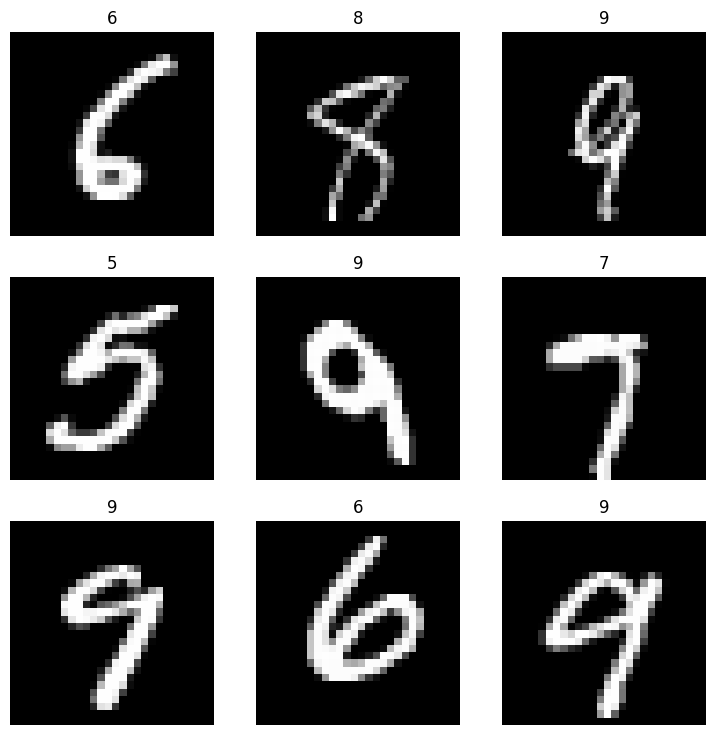

In [5]:
def label_func(f): return f.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames=files, label_func=label_func, num_workers=0)
dls.show_batch()

In [6]:
learn = vision_learner(dls, arch=resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/edvard/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:05<00:00, 9.03MB/s]


SuggestedLRs(valley=0.0020892962347716093)

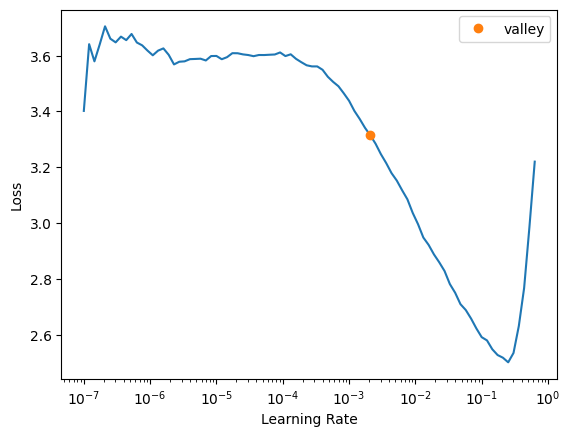

In [7]:
learn.lr_find()


In [8]:
learn.fine_tune(epochs=2, base_lr=0.002089, freeze_epochs=1)


epoch,train_loss,valid_loss,accuracy,time
0,0.758692,0.537260,0.828833,01:16


epoch,train_loss,valid_loss,accuracy,time
0,0.144390,0.069497,0.979250,02:24
1,0.068142,0.047283,0.985500,02:31


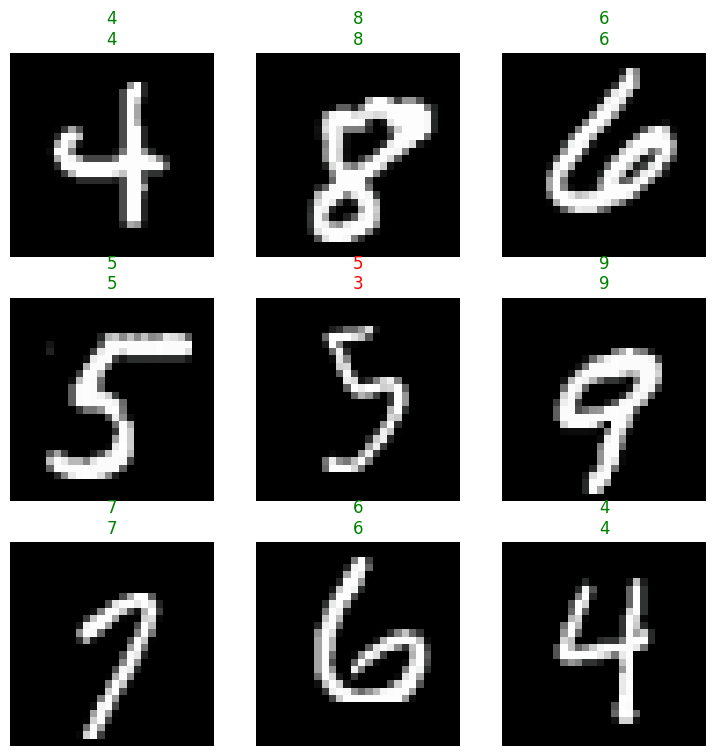

In [9]:
learn.show_results()

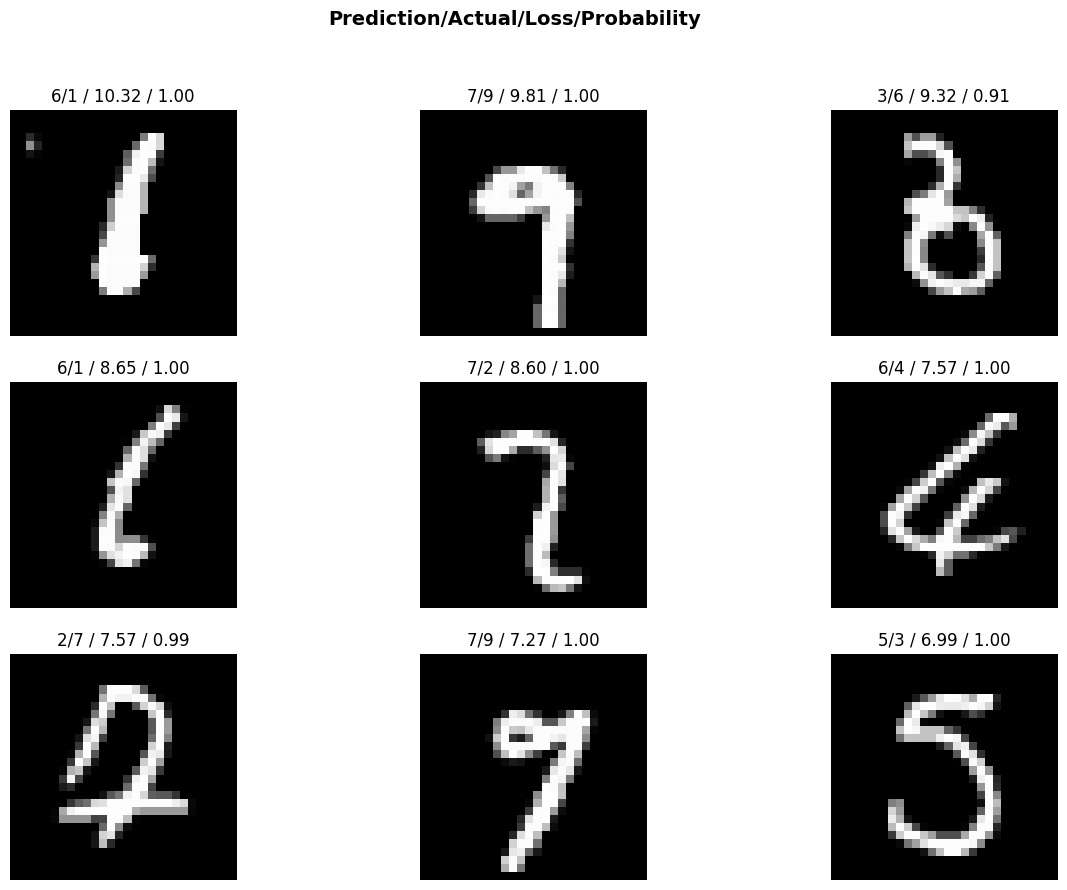

In [10]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))